In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('Brandintelle.csv')

## Exploratory Data Analysis (EDA)

In [27]:
# Checking first few rows of the dataset
df.head()

,Sr No,DATE,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends,events
0,1,23-11-2015,2754371.667,167687.6,0,95463.66667,7.290385e+07,0.00000,0,8125009,228213.98740,na
1,2,30-11-2015,2584276.667,214600.9,0,0.00000,1.658110e+07,29511.71546,31000,7901549,34258.57351,na
2,3,07-12-2015,2547386.667,0.0,248022,3404.00000,4.995477e+07,36132.35896,28400,8300197,127691.26130,event0
3,4,14-12-2015,2875220.000,625877.3,0,132600.00000,3.164930e+07,36804.21096,31900,8122883,84014.72031,na
4,5,21-12-2015,2215953.333,0.0,520005,0.00000,8.802269e+06,28401.74407,27100,7105985,20687.47816,na


In [28]:
# Checking data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sr No               208 non-null    int64  
 1   DATE                208 non-null    object 
 2   Sales               208 non-null    float64
 3   TV_Spends           208 non-null    float64
 4   OOH_Spends          208 non-null    int64  
 5   Print_Spends        208 non-null    float64
 6   FB_Impressions      208 non-null    float64
 7   Paid_Search_Clicks  208 non-null    float64
 8   Search_Spends       208 non-null    int64  
 9   competitor_sales_B  208 non-null    int64  
 10  FB_Spends           208 non-null    float64
 11  events              208 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 19.6+ KB


In [29]:
# Checking statistical summary of numerical variables
df.describe()

,Sr No,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends
count,208.000000,2.080000e+02,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,104.500000,1.822143e+06,1.113277e+05,81033.639423,27964.741987,2.446024e+07,50835.620540,44366.346154,5.538025e+06,64369.734788
std,60.188592,7.162286e+05,2.141877e+05,157483.924979,48623.026739,3.509738e+07,40842.281019,35268.769589,2.077192e+06,94810.914099
min,1.000000,6.722500e+05,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.240235e+06,0.000000
25%,52.750000,1.165211e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,18842.053510,17650.000000,3.589581e+06,0.000000
50%,104.500000,1.874514e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,42795.757485,36050.000000,5.538524e+06,0.000000
75%,156.250000,2.378407e+06,1.380503e+05,95359.000000,35758.750002,4.121226e+07,75710.530683,64025.000000,7.311814e+06,108690.367000
max,208.000000,3.827520e+06,1.185349e+06,938178.000000,239417.333300,1.782983e+08,156564.384600,134100.000000,9.984742e+06,462011.742200


### Univariate Analysis

#### -- For Numerical Attributes --

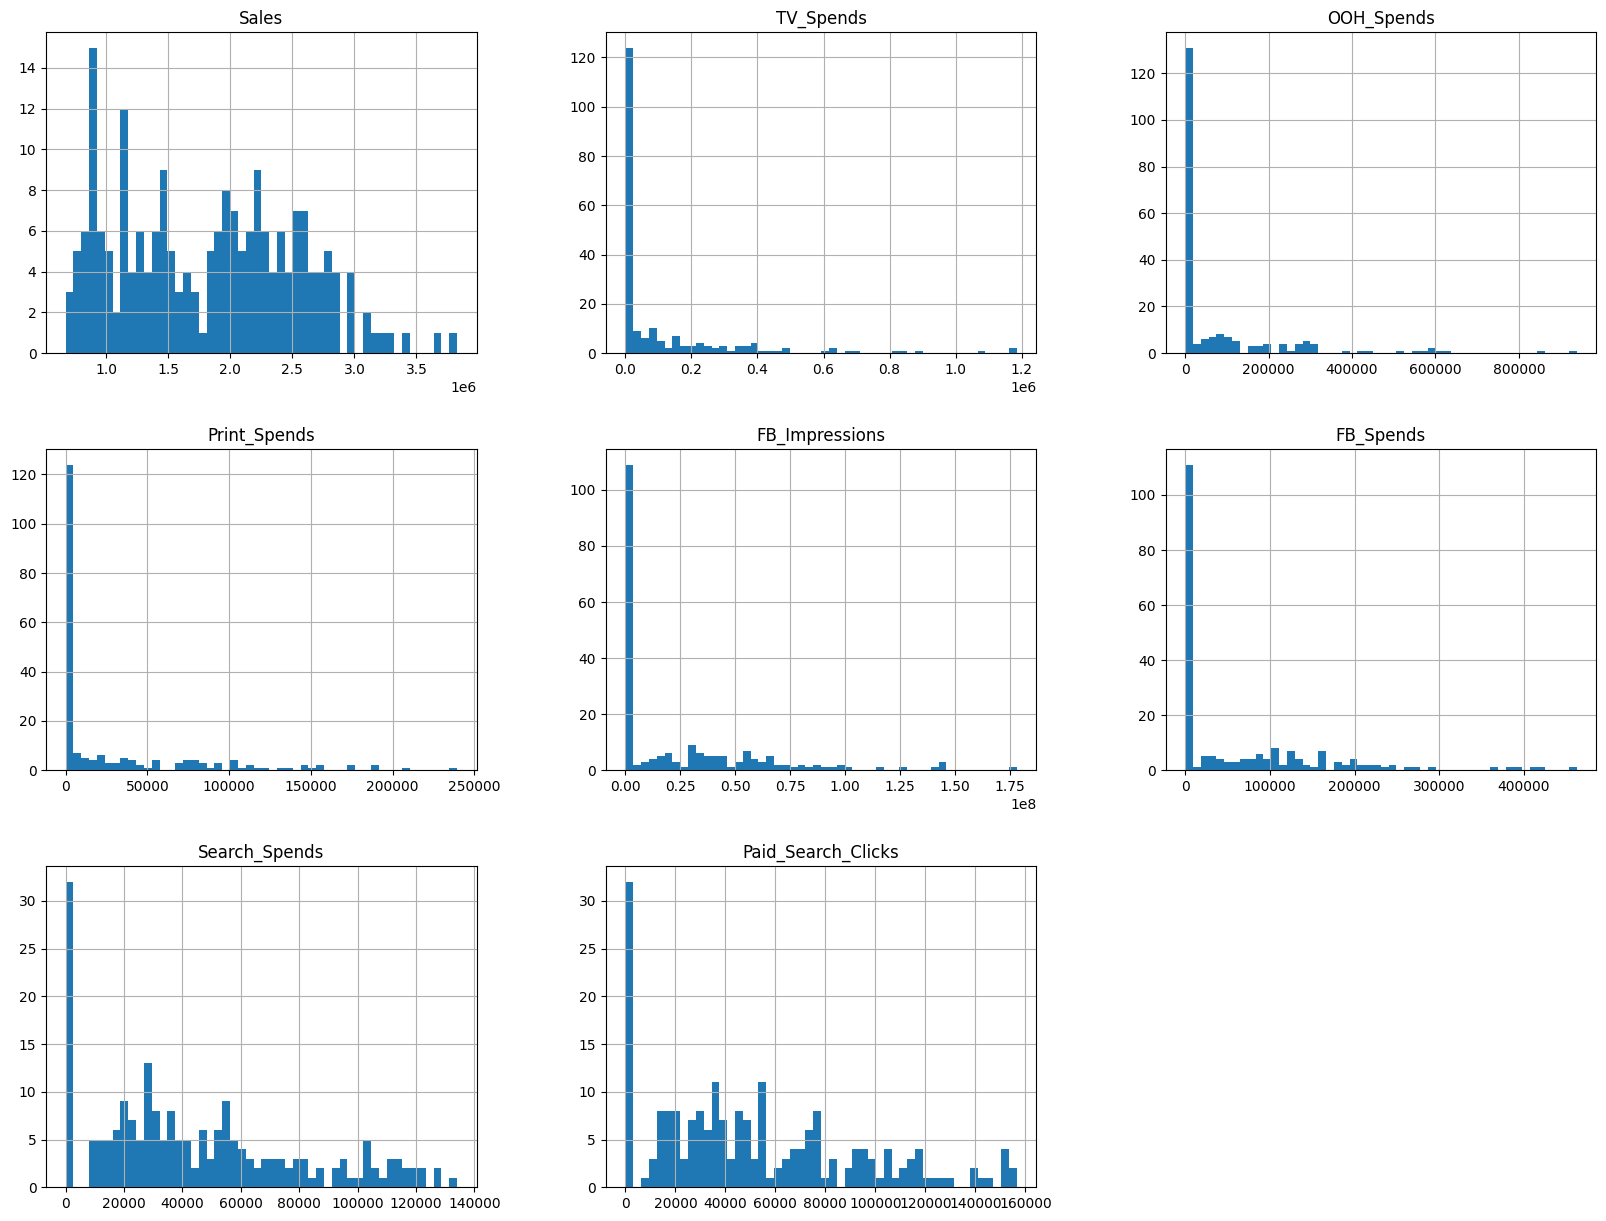

In [30]:
# Plot a histogram for each numerical attribute
numerical_attributes = ['Sales', 'TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks']
df[numerical_attributes].hist(bins=50, figsize=(20,15))
plt.show()

#### -- For Categorical Attribute --

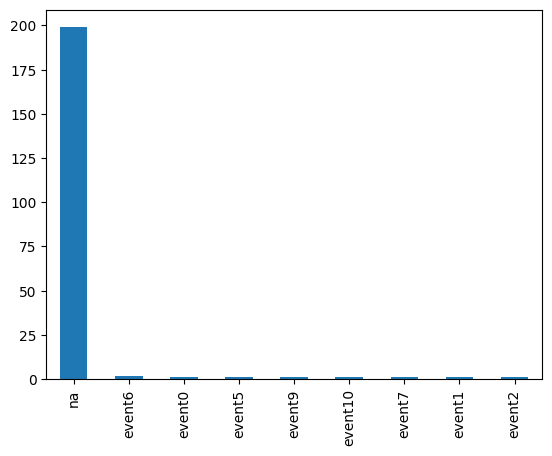

In [31]:
# Plot a bar chart for the categorical attribute
df['events'].value_counts().plot(kind='bar')
plt.show()

### Bivariate Analysis

#### -- For Numerical Attribute --

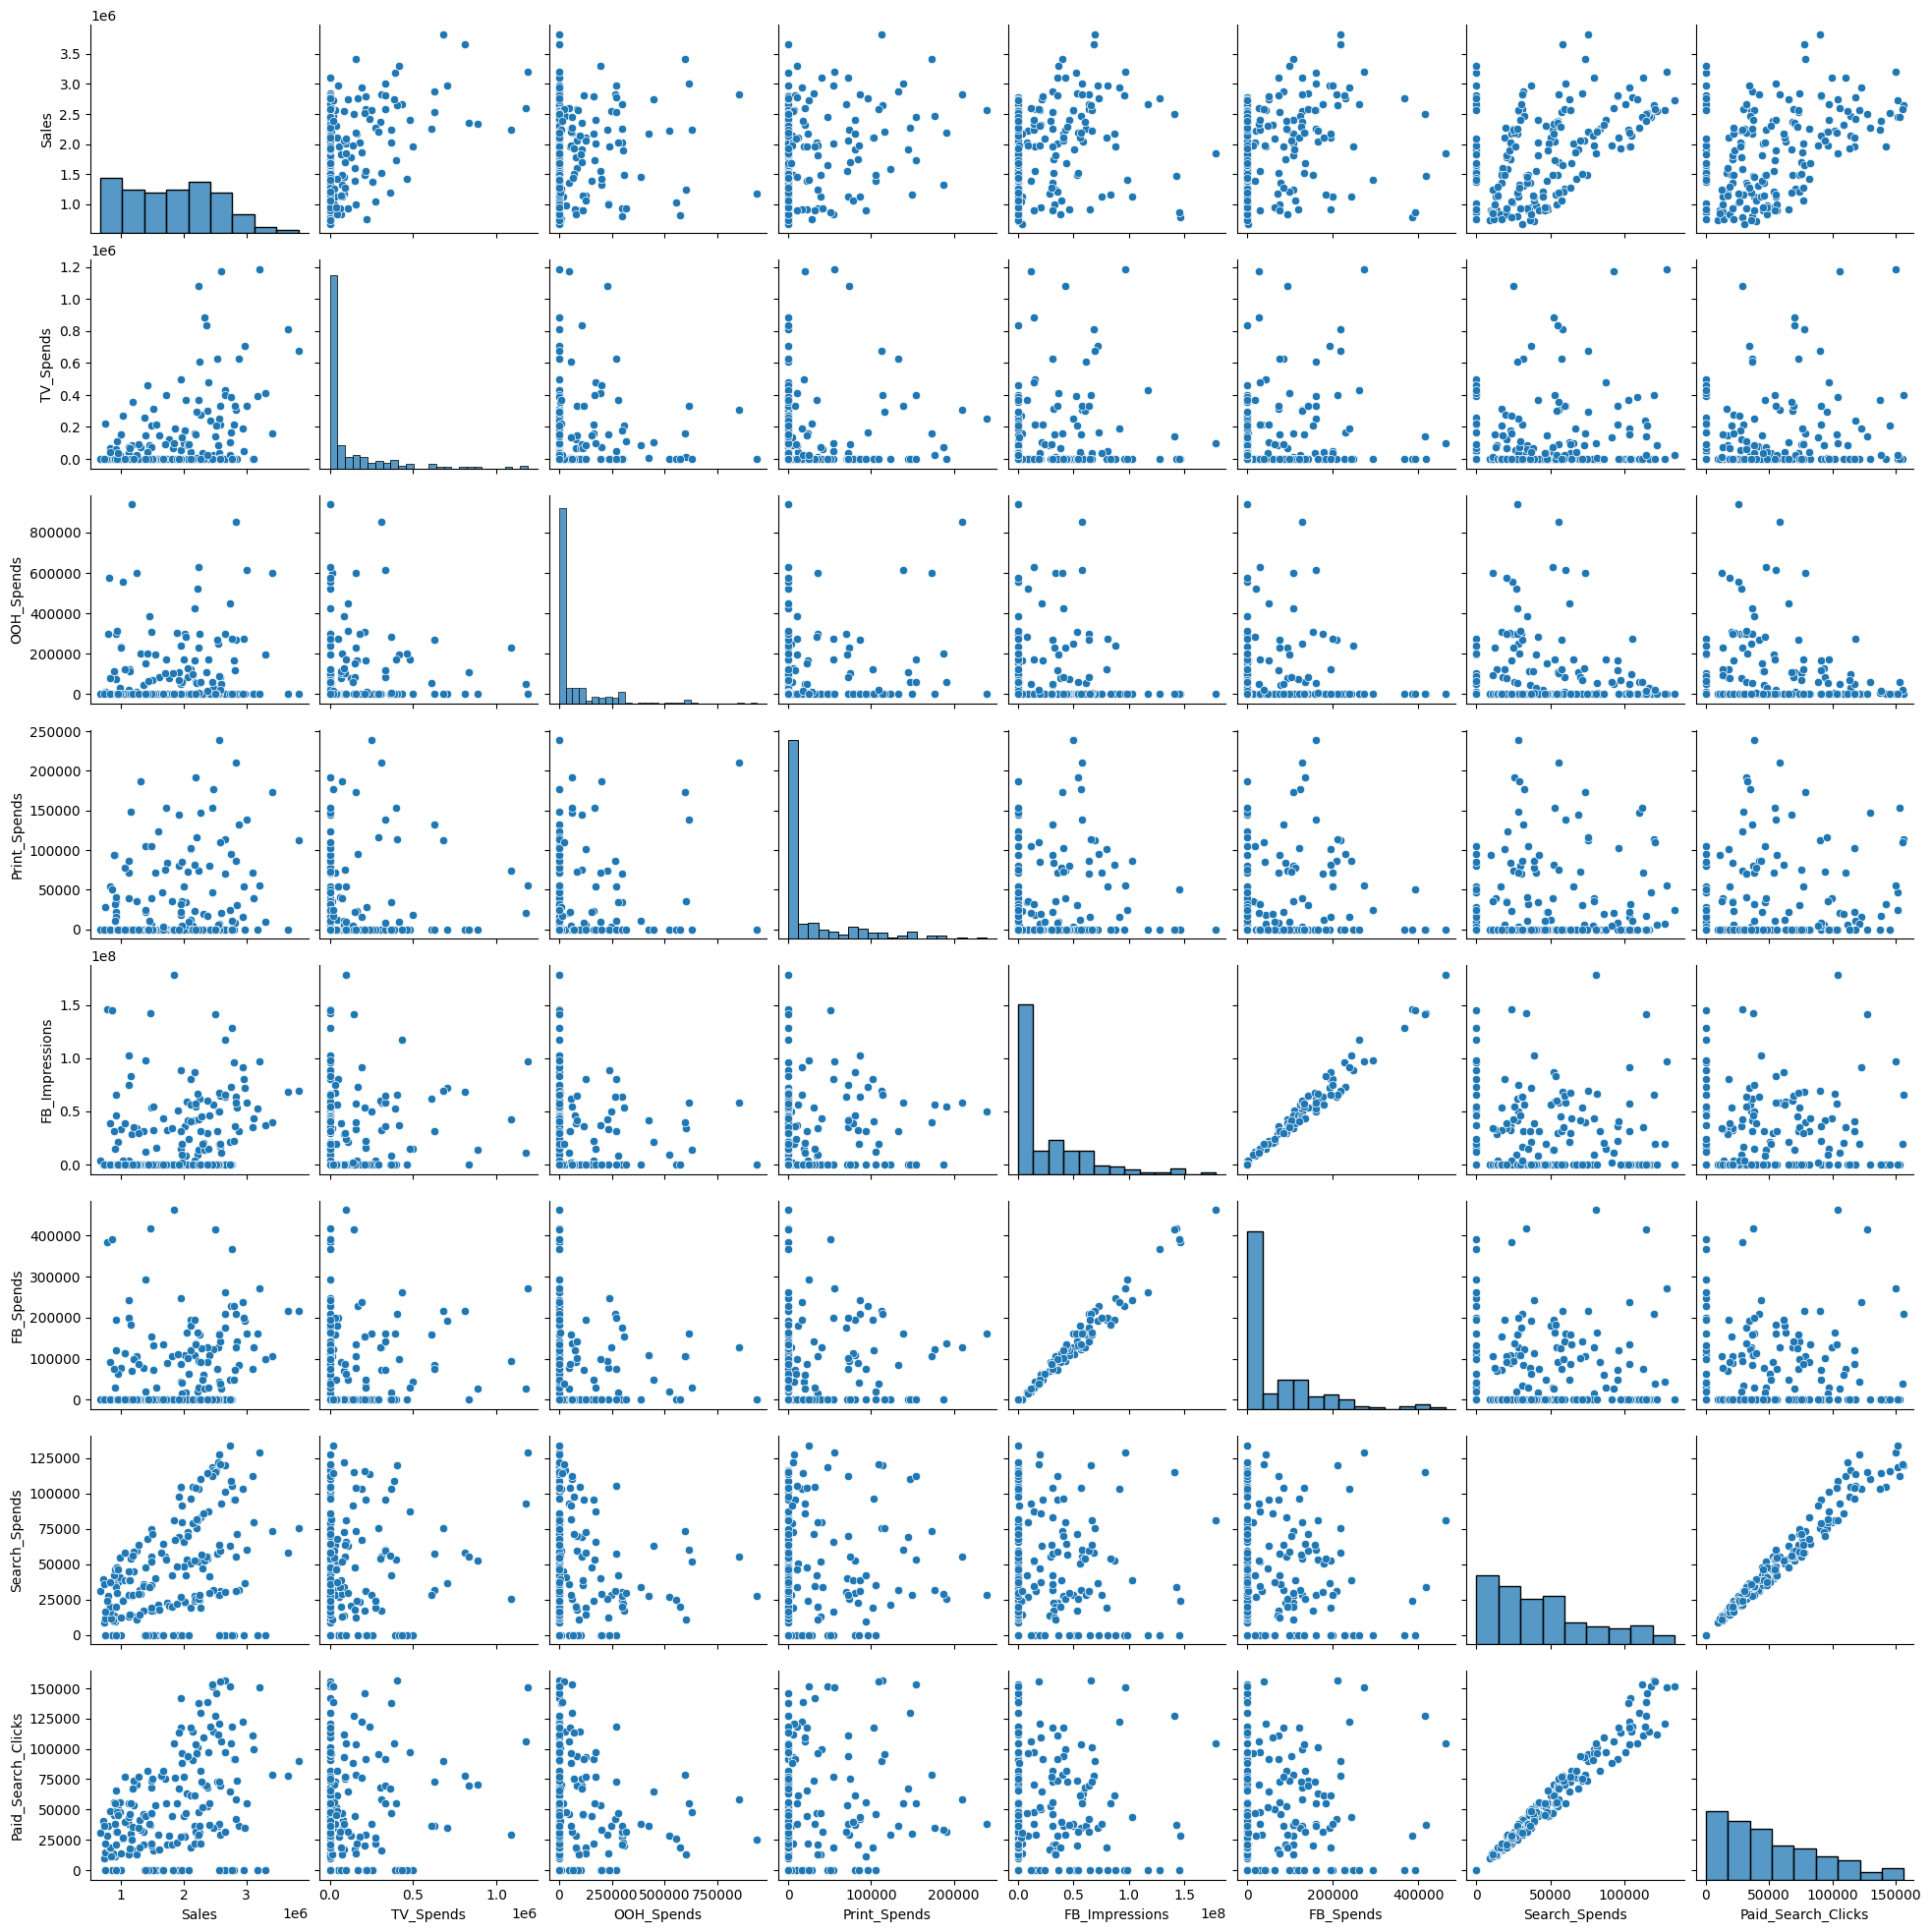

In [32]:
# Plot a scatter plot matrix for the numerical attributes
numerical_attributes = ['Sales', 'TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks']
sns.pairplot(df[numerical_attributes])
plt.show()

#### -- For Categorical Variable

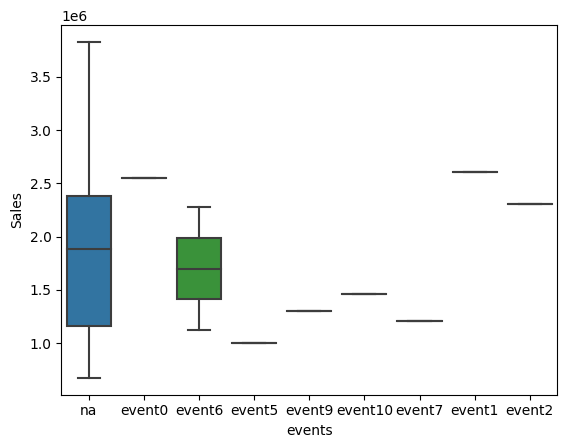

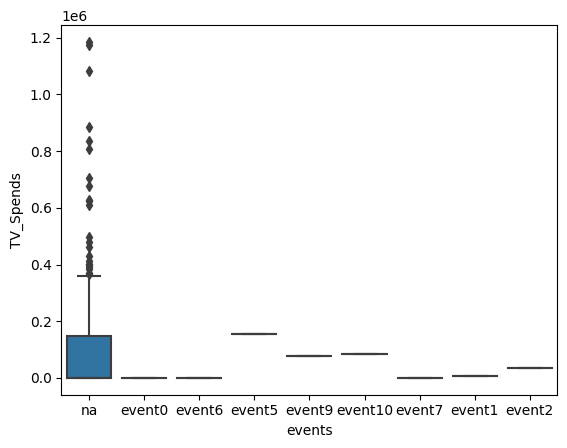

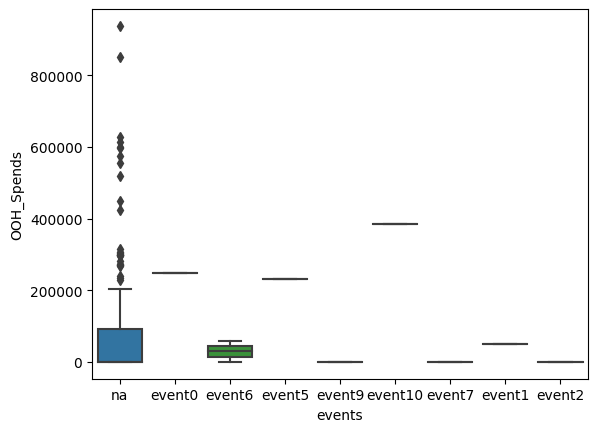

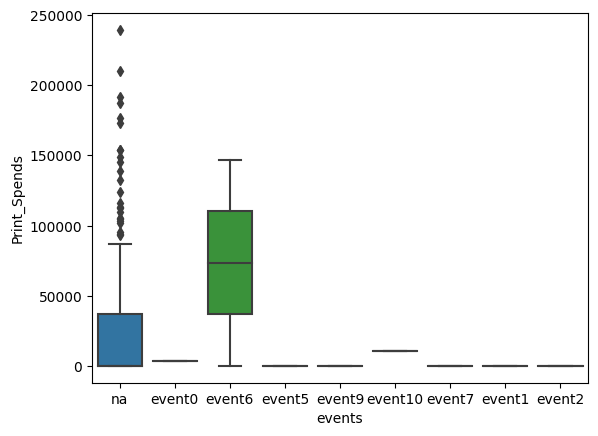

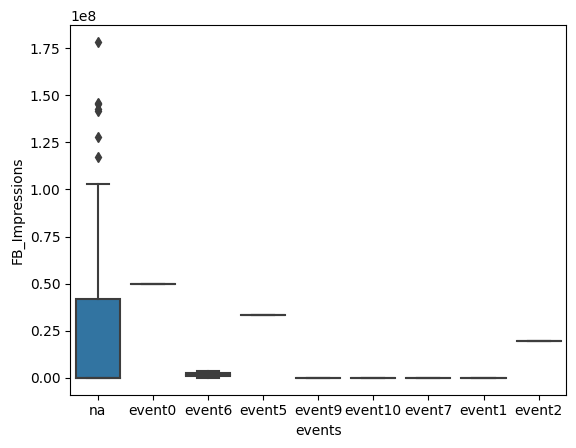

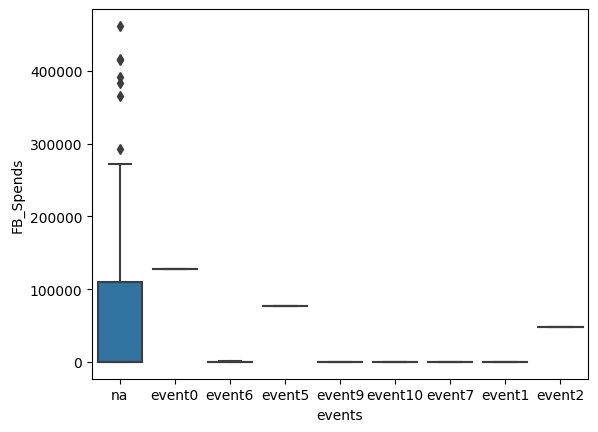

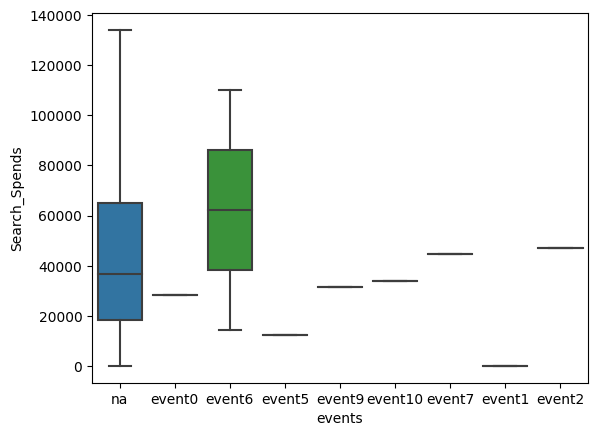

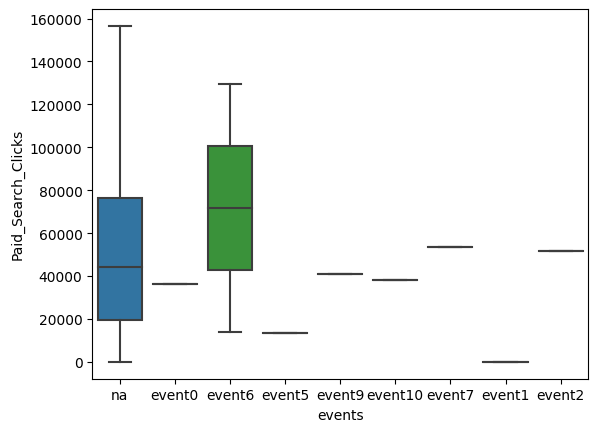

In [33]:
# Plot a box plot for each numerical attribute against the categorical attribute
for attribute in numerical_attributes:
    sns.boxplot(x='events', y=attribute, data=df)
    plt.show()

### Correlation Plot

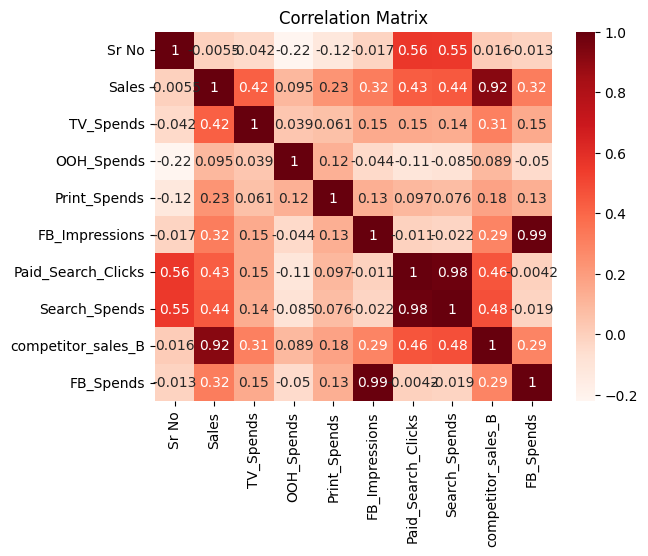

In [34]:
# Checking correlation between numerical variables
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

## Data Preparation / Data Preprocessing

### Checking for NA values and replacing with attribute median

In [41]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the median value of the attribute
df.fillna(df.median(numeric_only=True), inplace=True)

Sr No                 0
DATE                  0
Sales                 0
TV_Spends             0
OOH_Spends            0
Print_Spends          0
FB_Impressions        0
Paid_Search_Clicks    0
Search_Spends         0
competitor_sales_B    0
FB_Spends             0
events                0
dtype: int64


### Normalising numerical attributes

In [43]:
# Standardize the numerical attributes
numerical_attributes = ['Sales', 'TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks','competitor_sales_B']
scaler = StandardScaler()
df[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])

df.head()

,Sr No,DATE,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends,events
0,1,23-11-2015,1.304720,0.263768,-0.515793,1.391558,1.383593,-1.247684,-1.260985,1.248428,1.732285,na
1,2,30-11-2015,1.066660,0.483325,-0.515793,-0.576521,-0.225035,-0.523363,-0.379900,1.140591,-0.318358,na
2,3,07-12-2015,1.015030,-0.521021,1.062910,-0.506344,0.728146,-0.360870,-0.453797,1.332971,0.669483,event0
3,4,14-12-2015,1.473856,2.408126,-0.515793,2.157161,0.205326,-0.344380,-0.354320,1.247402,0.207702,na
4,5,21-12-2015,0.551166,-0.521021,2.794129,-0.576521,-0.447206,-0.550606,-0.490746,0.756667,-0.461842,na


## Model Building

### 1.Linear Regression

In [47]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the target and predictor variables
X = df[['TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks']]
y = df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Performace Evaluation

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean absolute error: 0.6649009442228748
Mean squared error: 0.639996251713845
Root mean squared error: 0.799997657317723
R-squared: 0.2024676711031611


### 2.Random Forest

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the target and predictor variables
X = df[['TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks']]
y = df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Performance Evaluation

In [51]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean absolute error: 0.5497321537230894
Mean squared error: 0.49273300796133385
Root mean squared error: 0.7019494340487311
R-squared: 0.3859799923649363


### 3.Support Vector Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Define the target and predictor variables
X = df[['TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions', 'FB_Spends', 'Search_Spends', 'Paid_Search_Clicks']]
y = df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an SVR model
model = SVR()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Performance Evaluation 

In [54]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean absolute error: 0.4911780706953334
Mean squared error: 0.3976044456968994
Root mean squared error: 0.630558836031103
R-squared: 0.504524598843795


## Conclusion

Built models using Linear Regression, Random Forest and Support Vector Regression. From Performance metrices it is found that Support Vector Regression model suits best as its Error rates are lower compared to other models